<h1>ACTIVITY2 - ACCIDENTS DATA ANALYTICS</h1>

<H2>Analyst: Gerald Prio</H2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
accidents  = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Descriptive Analytics</h2>

In [4]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h2>Cleaning the Data Frame</h2>

In [5]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mean())
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mean())
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('unkown')
accidents['Road_Type'] = accidents['Road_Type'].fillna('unkown')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unkown')

accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Data Types</h2>

In [6]:
accidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h2>Changing Data Types</h2>

In [7]:
accidents['Index'] = accidents['Index'].astype('category')
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

accidents.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<H2>Extracting Date Information Using Pandas Date Time</H2>

In [8]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Month_Name'] = accidents['Accident Date'].dt.month_name()
accidents['Date'] = accidents['Accident Date'].dt.day
accidents['Day'] = accidents['Accident Date'].dt.day_name()
accidents['Week'] = accidents['Accident Date'].dt.isocalendar().week

accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Month_Name                 0
Date                       0
Day                        0
Week                       0
dtype: int64

<h1>Data Analysis</h1>

<h2> 1. What are the most common vehicle types involved in accidents in 2019?</h2>

In [9]:
veh_counts_2019 = (accidents[accidents['Year'] == 2019]
                   .groupby('Vehicle_Type')
                   .size()
                   .sort_values(ascending=False))

veh_counts_2019

Vehicle_Type
Car                                      130304
Bus or coach (17 or more pass seats)      10483
Van / Goods 3.5 tonnes mgw or under        9303
Motorcycle over 500cc                      7686
Goods 7.5 tonnes mgw and over              6247
Motorcycle 125cc and under                 4313
Taxi/Private hire car                      4230
Motorcycle over 125cc and up to 500cc      2446
Motorcycle 50cc and under                  2136
Goods over 3.5t. and under 7.5t            2049
Other vehicle                              1588
Agricultural vehicle                        636
Minibus (8 - 16 passenger seats)            625
Pedal cycle                                  68
Ridden horse                                  1
Data missing or out of range                  0
dtype: int64

<h2>INSIGHT 1:</h2> 
<p>Based on the data above, cars dominated the accident statistics in 2019 with 130,304 recorded cases, making up the overwhelming majority compared to any other vehicle type. This makes sense since cars are the most common vehicles on the road, meaning their higher exposure leads to more accident involvement.</p>
<h2>INSIGHT 2:</h2>
<P>Other vehicles like buses (10,483 cases) and vans (9,303 cases) appeared much less, yet they still matter because of the higher number of passengers or goods they carry. Even though they don’t crash as often as cars, their accidents can affect more people at once.</P>
<H2>INSIGHT 3:</H2>
<P>Motorcycles together made up a noticeable share with more than 16,500 accidents across all engine sizes, reminding that riders remain one of the most vulnerable groups on the road. While their numbers are smaller compared to cars, the risks they face are much greater due to less protection.</P>

<H2>2. What is the correlation between casualties and vehicles in urban areas?</H2>

In [10]:
cas_veh_corr = accidents[accidents['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'].corr(
    accidents[accidents['Urban_or_Rural_Area'] == 'Urban']['Number_of_Vehicles'])

cas_veh_corr

np.float64(0.2176153598713952)

<h2>INSIGHT 4:</h2>
<P>The correlation between the number of vehicles and the number of casualties in urban areas is about 0.22, which indicates a weak to moderate positive relationship. This means that when more vehicles are involved in an accident, casualties also tend to increase, but the link is not very strong.</P>

<h2>3. Which district has the highest average number of casualties?</h2>

In [11]:
district_avg = accidents.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False)
district_avg.head(1)

District Area
Blaeu Gwent    1.693694
Name: Number_of_Casualties, dtype: float64

<h2>INSIGHT 5 :</h2>
<P>The results show that Blaeu Gwent recorded the highest average number of casualties per accident, with about 1.69 casualties per crash. This indicates that accidents in this district, while not necessarily the most frequent, tend to involve slightly more people being hurt compared to other areas.</P>

<H2>4. Which road type has the highest number of accidents?</H2>

In [12]:
road_accidents = accidents['Road_Type'].value_counts()
road_accidents.head(1)

Road_Type
Single carriageway    492143
Name: count, dtype: int64

<h2>INSIGHT 6:</h2>
<p>It shows that Single Carriageway recorded the highest number of accidents with 53,310 cases, making up about 74.18% of all accidents.</p>

<h2>5. Which year had the most reported accidents in the dataset?</h2>

In [13]:
year_counts = accidents.groupby(accidents['Accident Date'].dt.year).size().sort_values(ascending=False)
year_counts

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h2>INSIGHT 7:</h2> 
<p>The dataset shows that 2019 recorded the highest number of reported accidents with 182,115 cases, making it the peak year for road incidents. This suggests that traffic activity and risks were at their greatest just before the following years.</p>
<h2>INSIGHT 8:</h2>
<P>In 2020, accidents dropped to 170,591 cases, which is about 11,524 fewer accidents than 2019. The downward trend continued in 2021 with 163,554 accidents, and then again in 2022 with 144,419 accidents, which is a total decrease of nearly 37,700 cases compared to 2019.</P>

<h2>6. Which weather condition had the most accidents?</h2>

In [14]:
weather_counts = accidents.groupby('Weather_Conditions').size().sort_values(ascending=False)
weather_counts.head(1)

Weather_Conditions
Fine no high winds    520885
dtype: int64

<h2>INSIGHT 9:</h2>
<P>The majority of accidents happened during fine weather with no high winds, accounting for 520,885 cases. This shows that most crashes don’t necessarily happen in bad weather conditions but rather in normal driving conditions</P>

<h2>7. How are accidents distributed across different road surface conditions and light conditions?</h2>

In [15]:
acc_2020 = accidents[accidents['Year'] == 2020]

surface_light = (acc_2020.groupby(['Road_Surface_Conditions', 'Light_Conditions']).size().unstack())
surface_light

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Road_Surface_Conditions,,,,,
Dry,1226,17989,360,4049,89882
Flood over 3cm. deep,5,52,1,85,188
Frost or ice,49,853,24,760,2184
Snow,9,108,1,97,383
Wet or damp,492,14433,320,5065,31766
unkown,11,38,1,11,149


<h2>INSIGHT 10:</h2> 
<p>Based on the data above ,most accidents happened on dry roads during daylight, with a total of 89,882 cases. This shows that accidents are more likely in normal conditions rather than extreme ones.</p>
<h2>INSIGHT 11:</h2>
<P>Wet or damp roads also caused a significant number of accidents, especially during daylight with 31,766 cases and at light unlit darkness with 14,433 cases. This shows that slippery conditions remain a consistent risk even when visibility is good.</P>
<h2>INSIGHT 12:</h2>
<P>Rare but dangerous conditions like frost/ice and snow had fewer accidents. Frost/ice caused 2,184 accidents in daylight and 760 in unlit darkness, while snow caused 383 accidents in daylight and 97 with no lighting.</P>

<H2>8. What is the correlation between vehicles and casualties in fatal accidents?</H2>

In [16]:
accidents[accidents['Accident_Severity']=='Fatal']['Number_of_Casualties'].corr(
    accidents[accidents['Accident_Severity']=='Fatal']['Number_of_Vehicles'])

np.float64(0.2682128836247046)

<h2>INSIGHT 13 :</h2>
<P>The correlation between the number of vehicles and the number of casualties in fatal accidents is about 0.22. This shows a weak to moderate positive relationship, meaning that as more vehicles are involved in a fatal accident, the number of casualties tends to increase, but the connection is not very strong.</P>

<H2>9. What proportion of accidents happened in daylight vs. darkness in 2022? </H2>

In [17]:
lig_2022 = accidents[accidents['Year'] == 2022]

light_counts = lig_2022['Light_Conditions'].value_counts(normalize=True) * 100
light_counts

Light_Conditions
Daylight                       74.621760
Darkness - lights lit          19.072283
Darkness - no lighting          5.056121
Darkness - lighting unknown     0.911930
Darkness - lights unlit         0.337906
Name: proportion, dtype: float64

<H2>INSIGHT: 14</H2>
<P>In 2022, the most accidents occurred in daylight (73.6%), while 19.0% happened at night with proper street lighting. Only 5.0% occurred in areas with no lighting, and less than 1% where lighting was unknown or unlit. This means that good visibility does not guarantee road safety, accidents are still more common during the day.</P>

<h2>10. What proportion of accidents happened under different weather conditions in 2019?</h2>

In [18]:
accidents_2019 = accidents[accidents['Year'] == 2019]

weather_counts = accidents_2019['Weather_Conditions'].value_counts(normalize=True) * 100
weather_counts

Weather_Conditions
Fine no high winds       79.002828
Raining no high winds    12.538780
unkown                    2.269994
Other                     2.241990
Raining + high winds      1.624798
Fine + high winds         1.397469
Fog or mist               0.470582
Snowing no high winds     0.373390
Snowing + high winds      0.080169
Name: proportion, dtype: float64

<H2>INSIGHT: 15</H2>
<P>In 2019, the majority of accident happened in fine weather (79%), while 12.5% occurred during rain without high winds and 1.6% rain with high winds. Severe weather like fog (0.47%) and snow (0.45% combined) made up less than 1% of accidents.</P>

<h2>11. How did weather conditions affect the number of accidents in urban vs. rural areas in 2020?</h2>

In [19]:
accidents_2020 = accidents[accidents['Year'] == 2020]

weather_2022 = accidents_2020.groupby(['Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack(level=0)
weather_2022

Urban_or_Rural_Area,Rural,Unallocated,Urban
Weather_Conditions,,,
Fine + high winds,1370,0,1491
Fine no high winds,46352,3,86158
Fog or mist,672,0,309
Other,1794,0,2471
Raining + high winds,1521,0,1609
Raining no high winds,8645,3,13336
Snowing + high winds,148,0,53
Snowing no high winds,443,0,276
unkown,1046,0,2891


<h2>INSIGHT 16:</h2> 
<p>Based on the data above ,most accidents happened in good weather. Urban areas had 86,158 accidents, almost twice as many as rural areas with 46,352. This shows that accidents are not just caused by bad weather, but mostly by traffic, driver behavior, and congestion, especially in cities.</p>
<h2>INSIGHT 17:</h2>
<P>During rainy weather, urban still had more accidents (13,336) compared to rural (8,645). Wet roads increase the chance of crashes, and in cities, where traffic is heavier and stopping distance is shorter, rain becomes even more dangerous.</P>
<h2>INSIGHT 18:</h2>
<P>In foggy conditions, rural areas were more affected with 672 accidents, compared to only 309 in urban areas. This suggests that rural drivers face bigger risks during fog because of higher driving speeds and limited street lighting outside the city.</P>

<h2>12. Which day of the week consistently recorded the highest number of accidents from 2019 to 2022? </h2>

In [20]:
weekday_trends = accidents.groupby(['Year', 'Day']).size().unstack()
weekday_trends

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2019,27303,20386,29262,24686,27300,26251,26927
2020,24948,18750,27387,23050,25830,24381,26245
2021,24305,17861,26666,22160,24799,22972,24791
2022,21344,15683,23863,19406,21582,20946,21595


<h2>INSIGHT 19:</h2> 
<p>Based on the data above, Saturdays consistently recorded the highest number of accidents (29,262 in 2019, 27,387 in 2020, 26,666 in 2021, and 23,863 in 2022) while, Mondays had the lowest accident counts every year (20,386 in 2019 down to 15,683 in 2022).</p>

<h2>13. Which month recorded the highest number of accidents across years?</h2>

In [21]:
monthly_accidents = accidents.groupby(['Year', 'Month']).size().unstack()
monthly_accidents

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,15355,13253,15049,14125,15833,15528,15862,15044,15271,15528,16559,14708
2020,14133,14353,13494,13394,14336,14205,14630,13366,14432,15684,14770,13794
2021,13417,10950,13202,12715,13811,13936,14300,13415,13792,14834,15473,13709
2022,9967,10935,12341,11510,12372,12812,12653,12088,12960,13534,13622,9625


<h2>INSIGHT 20:</h2> 
<p>In 2019, November had the most accidents with 16,559 cases, and in 2021 it was also the top month with 15,473. This shows that late autumn can be more dangerous on the roads, probably because days are shorter and traffic gets heavier before the holidays.</p>
<h2>INSIGHT 21:</h2>
<P>In 2020, October recorded the most accidents (15,684), while in 2022, September was the peak with 12,960. This tells that it’s not always the same month every year changes in weather and travel patterns can shift when accidents are most common.</P>
<h2>INSIGHT 22:</h2>
<P>February usually had the fewest accidents, like only 10,950 in 2021. Since February is the shortest month and often has cold weather, fewer people are out driving, which may explain the lower numbers.</P>

<h2>14. Which road types were car accidents most common in 2019?</h2>

In [22]:
accidents_2019 = accidents[accidents['Year'] == 2019]

car_accidents = accidents_2019[accidents_2019["Vehicle_Type"].str.contains("Car", case=False, na=False)]
car_road_types = car_accidents.groupby("Road_Type").size()
car_road_types


Road_Type
Dual carriageway      20710
One way street         2853
Roundabout             8665
Single carriageway    99677
Slip road              1458
unkown                 1171
dtype: int64

<h2>INSIGHT 23:</h2> 
<p>Based on the data above, Single Carriageway roads had the most accidents with 99,677 cases, which is almost five times higher than the next highest road type. This shows that single carriageways are the riskiest for car drivers.</p>
<h2>INSIGHT 24:</h2>
<P>Dual Carriageways recorded 20,710 accidents, making them the second most common type. Even though these roads are designed to be safer with separated lanes, their higher speed limits may contribute to accidents.</P>
<h2>INSIGHT 25:</h2>
<P>Roundabouts had 8,665 accidents, which is less than single and dual carriageways but still a significant number, likely because of high vehicle interaction at intersections. One Way Streets (2,853), Slip Roads (1,458), and Unknown road types (1,171) had the lowest accident numbers. While fewer accidents happen here, they still contribute to overall risks, especially in urban areas where these roads are common.</P>

<h1>Univariate Analysis on accident that happened in 2019</h1>

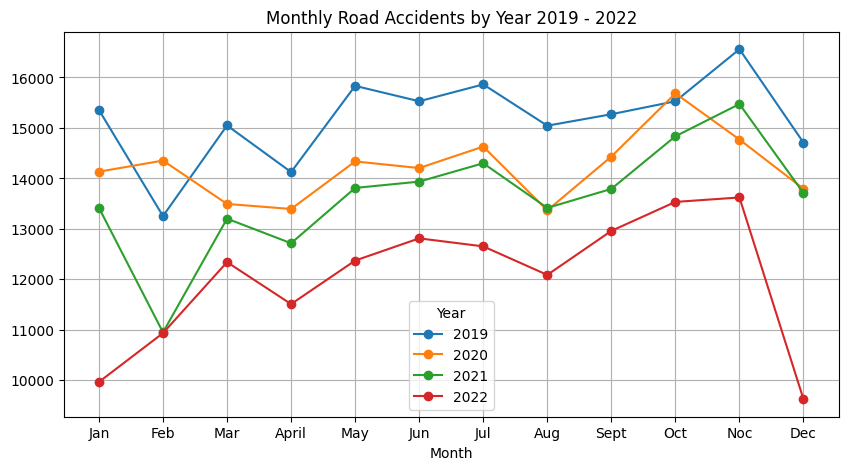

In [23]:
import matplotlib.pyplot as plt
monthly_data = accidents.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker = 'o',
    figsize = (10,5),
    title = 'Monthly Road Accidents by Year 2019 - 2022'
)

plt.xticks(range(1,13), ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sept','Oct','Noc','Dec'])
plt.grid(alpha=1)
plt.show()

In [24]:
year_2019 = accidents[accidents['Year'] == 2019]
print(f"Total number of Accident in 2019 is {year_2019['Light_Conditions'].value_counts().sum()}")
year_2019['Light_Conditions'].value_counts()

Total number of Accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h2>15. Which months record the highest number of fatal accidents?</h2>

In [25]:
highest_fatal = accidents[accidents["Accident_Severity"] == "Fatal"]["Month"].value_counts().sort_index()


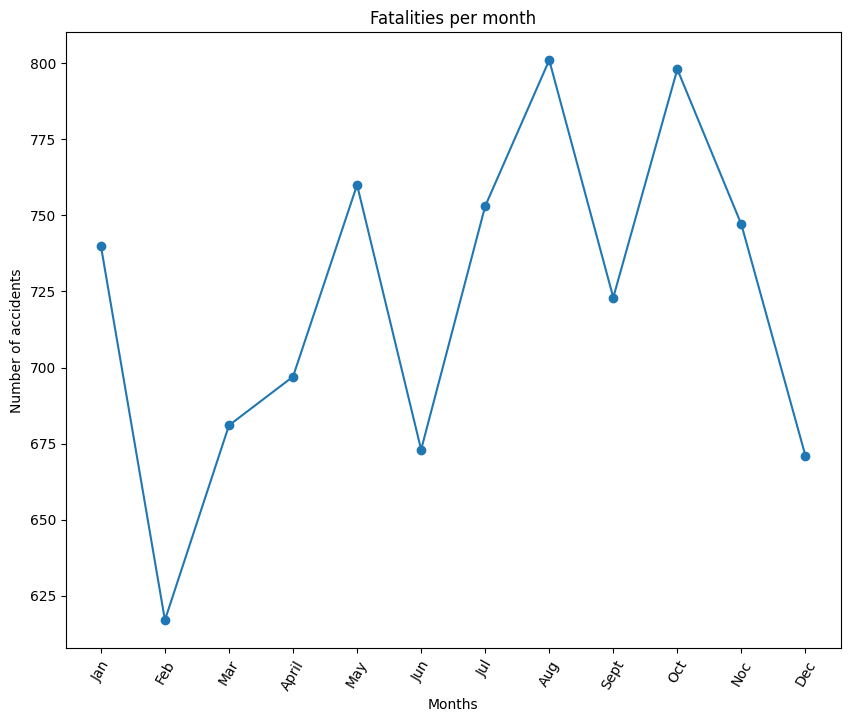

In [28]:
labels = ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sept','Oct','Noc','Dec']
highest_fatal.plot(kind='line',
                   figsize=(10,8),
                   marker='o')
plt.xlabel('Months')
plt.ylabel('Number of accidents')
plt.title('Fatalities per month')
plt.xticks(ticks=range(1, 13), labels=labels, rotation=60)
plt.show()

<h2>INSIGHT 26:</h2>
<P>Based on the data above, we can see that the number of fatal accidents fluctuates throughout the year, with peaks occurring in August and October, both recording the highest accident counts. The lowest number of fatalities is observed in February, indicating a sharp drop compared to other months. Overall, the mid to late months of the year (August–October) appear to be the most dangerous periods, while the early months tend to record fewer fatal accidents.</P>

<h2>16. Which type of accident severity was most common in 2019?</h2>

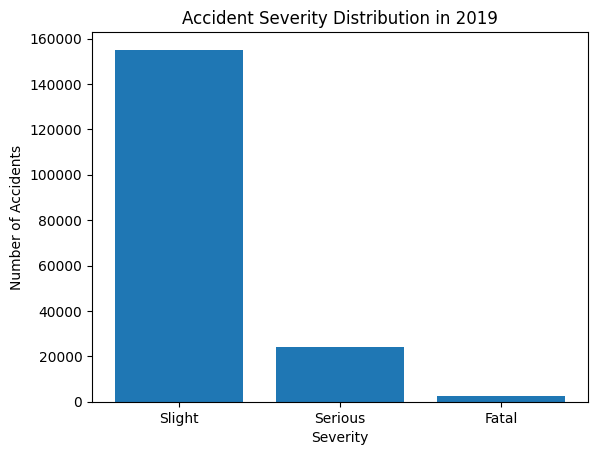

In [29]:
accidents_2019 = accidents[accidents['Accident Date'].dt.year == 2019]
severity_2019 = accidents_2019['Accident_Severity'].value_counts()

plt.bar(severity_2019.index, severity_2019.values)
plt.title("Accident Severity Distribution in 2019")
plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 27:</h2>
<P>The chart shows that in 2019, the majority of accidents were classified as slight, making up a very large portion compared to other severity levels. Serious accidents were significantly fewer, while fatal accidents were the least common. This indicates that although road accidents were frequent, most of them did not result in severe or fatal consequences.</P>

<h2>17. What weather conditions were most associated with accidents in 2021?</h2>

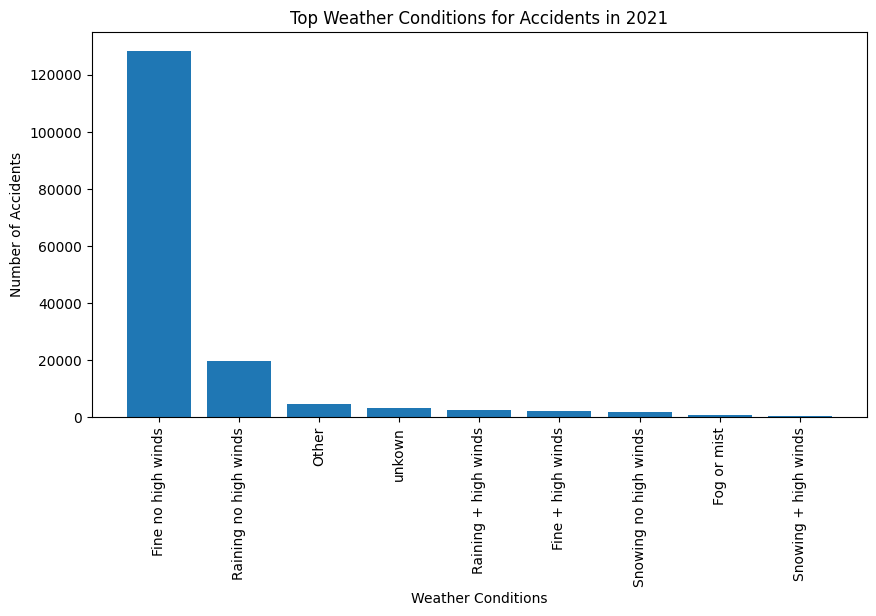

In [54]:
accidents_2021 = accidents[accidents['Accident Date'].dt.year == 2021]
weather_2021 = accidents_2021['Weather_Conditions'].value_counts().head(10)

plt.bar(weather_2021.index, weather_2021.values)
plt.title("Top Weather Conditions for Accidents in 2021")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10, 5)
plt.show()

<h2>INSIGHT 28:</h2>
<P>The chart shows that in 2021, the vast majority of accidents occurred under fine weather with no high winds, indicating that good weather conditions do not necessarily prevent accidents. A much smaller portion of accidents happened during raining without high winds, while other weather conditions such as fog, snow, or strong winds contributed very little.</P>

<h2>18. Which vehicle type was most frequently involved in accidents in 2019?</h2>

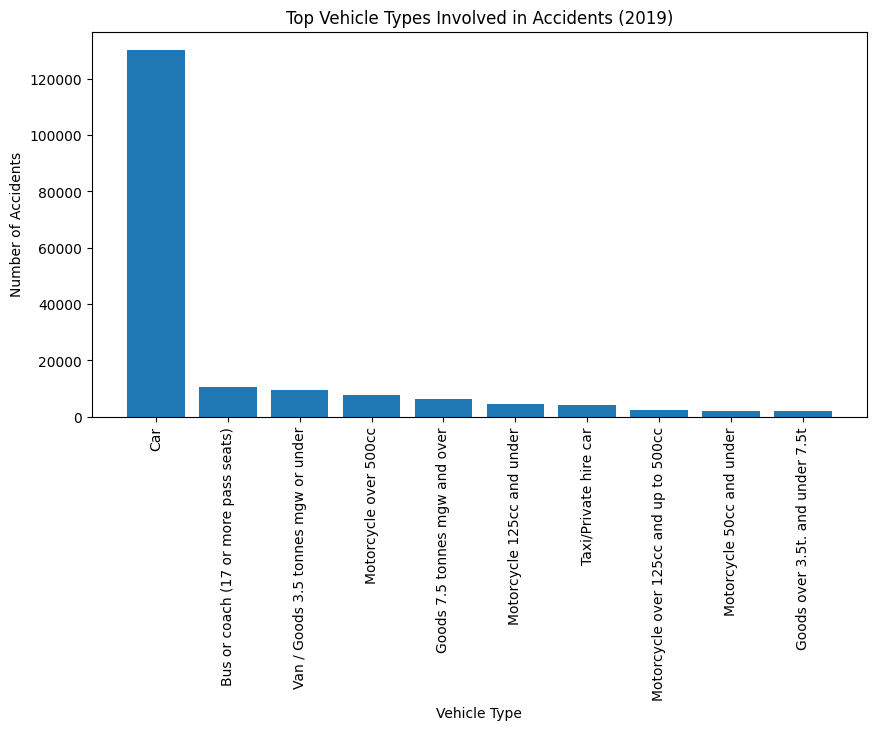

In [43]:
vehicle_2019 = accidents_2019['Vehicle_Type'].value_counts().head(10)

plt.bar(vehicle_2019.index, vehicle_2019.values)
plt.title("Top Vehicle Types Involved in Accidents (2019)")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10, 5)
plt.show()

<h2>INSIGHT 29:</h2>
<P>The chart shows that in 2019, the majority of accidents involved cars, making them the most frequently affected vehicle type on the road. A smaller portion of accidents involved motorcycles and taxis/private hire cars, while larger vehicles like buses and coaches contributed very little.</P>

<h2>19. Which road surface condition had the highest number of accidents in 2020?</h2>

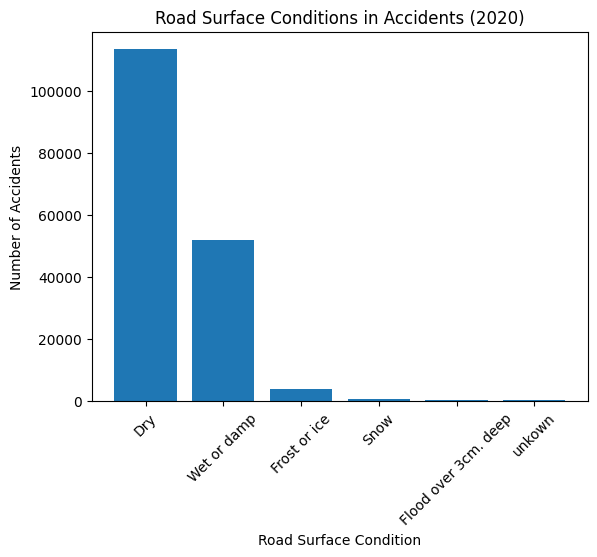

In [48]:
road_surface_2020 = accidents_2020['Road_Surface_Conditions'].value_counts()

plt.bar(road_surface_2020.index, road_surface_2020.values)
plt.title("Road Surface Conditions in Accidents (2020)")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h2>INSIGHT 30:</h2>
<P>The chart shows that in 2020, the majority of accidents occurred on dry road surfaces, making them the most common condition for accidents. A smaller portion of accidents happened on wet or damp surfaces, while very few were recorded on frost, snow, floodwater, or unknown conditions.</P>

<H1>Using FOLIUM Library or LEAFLET JS</H1>

In [51]:
import folium
from folium.plugins import HeatMap

In [52]:
highland = accidents[accidents["District Area"] == 'Highland']
highland.value_counts().sum()

locations = list(zip(highland['Latitude'], highland['Longitude']))

m = folium.Map(locations = [highland['Latitude'].mean(), highland['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("highland.html")
m

In [55]:
dudley = accidents[accidents["District Area"] == 'Dudley']
dudley.value_counts().sum()

locations = list(zip(dudley['Latitude'], dudley['Longitude']))

m = folium.Map(locations = [dudley['Latitude'].mean(), dudley['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("dudley.html")
m

In [56]:
kettering = accidents[accidents["District Area"] == 'Kettering']
kettering.value_counts().sum()

locations = list(zip(kettering['Latitude'], kettering['Longitude']))

m = folium.Map(locations = [kettering['Latitude'].mean(), kettering['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("kettering.html")
m

In [57]:
daventry = accidents[accidents["District Area"] == 'Daventry']
daventry.value_counts().sum()

locations = list(zip(daventry['Latitude'], daventry['Longitude']))

m = folium.Map(locations = [daventry['Latitude'].mean(), daventry['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("daventry.html")
m

In [58]:
northampton = accidents[accidents["District Area"] == 'Northampton']
northampton.value_counts().sum()

locations = list(zip(northampton['Latitude'], northampton['Longitude']))

m = folium.Map(locations = [northampton['Latitude'].mean(), northampton['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("northampton.html")
m

In [ ]:
south_northampton = accidents[accidents["District Area"] == 'South Northamptonshire']
south_northampton.value_counts().sum()

locations = list(zip(south_northampton['Latitude'], south_northampton['Longitude']))

m = folium.Map(locations = [northampton['Latitude'].mean(), northampton['Longitude'].mean()], zoom_start = 10)
HeatMap(locations).add_to(m)
m.save("northampton.html")
m